In [101]:
pip install --upgrade google-play-scraper


Note: you may need to restart the kernel to use updated packages.


In [102]:
#!pip install -qq google_play_scraper
!pip install -q transformers

In [103]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [104]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
top_up = reviews_all('com.topup.ui',sleep_milliseconds=0, lang='en',country='NG',  sort=Sort.NEWEST)

In [105]:
top_up

[{'reviewId': '75206cec-e12b-44e2-aca0-76d6c0a622a5',
  'userName': 'neptune carl',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocL8zCVDcmBEDS4LFwB2a50byT1LTgap8wrTHvJh9RYyXB-rAQ=mo',
  'content': 'Valid card still not getting through',
  'score': 2,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.12.35',
  'at': datetime.datetime(2024, 12, 22, 23, 47, 9),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.12.35'},
 {'reviewId': '71a8504a-8a34-40bc-b2be-64bf44e4b563',
  'userName': 'connie osborne',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWFu4JPfV7FZ7VwZleXnRWs9PQWF5q0jpb_zSEYmN-dPLDanvrI',
  'content': 'Terrible did not work just took my money',
  'score': 1,
  'thumbsUpCount': 1,
  'reviewCreatedVersion': '2.12.35',
  'at': datetime.datetime(2024, 11, 22, 14, 47, 37),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.12.35'},
 {'reviewId': 'e3b91a5d-f99e-4ac7-9191-938756d507b0',
  'userName': 'Mark Francisco',
  'us

In [106]:
# convert the json data into a dataframe
top_up_df = pd.json_normalize(top_up)

In [107]:
top_up_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,75206cec-e12b-44e2-aca0-76d6c0a622a5,neptune carl,https://play-lh.googleusercontent.com/a/ACg8oc...,Valid card still not getting through,2,0,2.12.35,2024-12-22 23:47:09,None,NaT,2.12.35
1,71a8504a-8a34-40bc-b2be-64bf44e4b563,connie osborne,https://play-lh.googleusercontent.com/a-/ALV-U...,Terrible did not work just took my money,1,1,2.12.35,2024-11-22 14:47:37,None,NaT,2.12.35
2,e3b91a5d-f99e-4ac7-9191-938756d507b0,Mark Francisco,https://play-lh.googleusercontent.com/a-/ALV-U...,I was trying to use this again but noticed tha...,1,0,2.12.35,2024-11-21 04:22:14,None,NaT,2.12.35
3,bcccaf2c-aaea-43f0-9356-239349f895e9,Georgia Rose,https://play-lh.googleusercontent.com/a/ACg8oc...,"Every time I buy credit on this app, it takes ...",1,1,None,2024-11-10 01:34:10,None,NaT,None
4,3e90988c-08ad-422b-b9bc-37fdd05a2f08,Jaydon Baya,https://play-lh.googleusercontent.com/a/ACg8oc...,Quick sending very easy to use but need offers...,5,4,2.12.34,2024-10-24 20:28:51,None,NaT,2.12.34


In [108]:
top_up_df.shape

(142, 11)

SENTIMENT ANALYSIS

In [110]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "C:/Users/HP USER/Documents/CoK DSFP"  # Directory to save the model


In [111]:
pip install --upgrade tensorflow

In [112]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path, safe_serialization=False)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu
Device set to use cpu


In [113]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("Aisha keep the same positve energy and bad")
print(result)

[{'label': 'NEGATIVE', 'score': 0.9938953518867493}]


In [114]:
#removing wildcharacter and cleaning the content column by casting to a str
top_up_df['content_new']= top_up_df['content'].astype('str')

In [115]:
top_up_df['result'] =top_up_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [116]:
top_up_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,75206cec-e12b-44e2-aca0-76d6c0a622a5,neptune carl,https://play-lh.googleusercontent.com/a/ACg8oc...,Valid card still not getting through,2,0,2.12.35,2024-12-22 23:47:09,None,NaT,2.12.35,Valid card still not getting through,"[{'label': 'NEGATIVE', 'score': 0.999432742595..."
1,71a8504a-8a34-40bc-b2be-64bf44e4b563,connie osborne,https://play-lh.googleusercontent.com/a-/ALV-U...,Terrible did not work just took my money,1,1,2.12.35,2024-11-22 14:47:37,None,NaT,2.12.35,Terrible did not work just took my money,"[{'label': 'NEGATIVE', 'score': 0.999504804611..."
2,e3b91a5d-f99e-4ac7-9191-938756d507b0,Mark Francisco,https://play-lh.googleusercontent.com/a-/ALV-U...,I was trying to use this again but noticed tha...,1,0,2.12.35,2024-11-21 04:22:14,None,NaT,2.12.35,I was trying to use this again but noticed tha...,"[{'label': 'POSITIVE', 'score': 0.983810842037..."
3,bcccaf2c-aaea-43f0-9356-239349f895e9,Georgia Rose,https://play-lh.googleusercontent.com/a/ACg8oc...,"Every time I buy credit on this app, it takes ...",1,1,None,2024-11-10 01:34:10,None,NaT,None,"Every time I buy credit on this app, it takes ...","[{'label': 'NEGATIVE', 'score': 0.999502658843..."
4,3e90988c-08ad-422b-b9bc-37fdd05a2f08,Jaydon Baya,https://play-lh.googleusercontent.com/a/ACg8oc...,Quick sending very easy to use but need offers...,5,4,2.12.34,2024-10-24 20:28:51,None,NaT,2.12.34,Quick sending very easy to use but need offers...,"[{'label': 'POSITIVE', 'score': 0.998166561126..."


In [117]:
# spliting the result into sentiment and score
top_up_df['sentiment'] = top_up_df['result'].apply(lambda x: (x[0]['label']))
top_up_df['score'] = top_up_df['result'].apply(lambda x: (x[0]['score']))

In [118]:
top_up_df[['content','score','sentiment']]

,content,score,sentiment
0,Valid card still not getting through,0.999433,NEGATIVE
1,Terrible did not work just took my money,0.999505,NEGATIVE
2,I was trying to use this again but noticed tha...,0.983811,POSITIVE
3,"Every time I buy credit on this app, it takes ...",0.999503,NEGATIVE
4,Quick sending very easy to use but need offers...,0.998167,POSITIVE
...,...,...,...
137,Minimum Top up amonut too high,0.888728,POSITIVE
138,Worst exchange rate.,0.999422,NEGATIVE
139,Just try this up,0.991882,POSITIVE
140,"It a scam I hate it , it took my money and I r...",0.999491,NEGATIVE


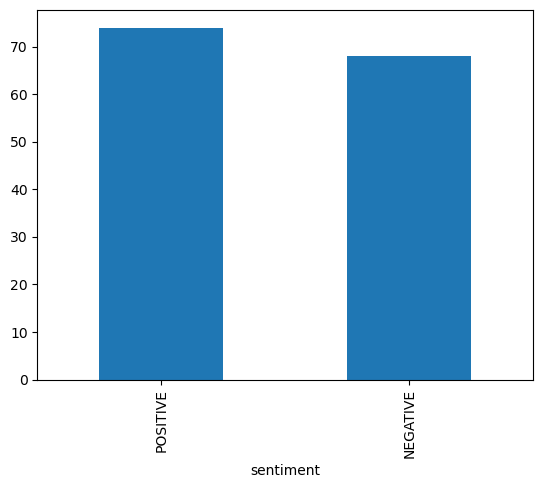

In [119]:
top_up_df['sentiment'].value_counts().plot(kind='bar');

TOPIC MODELLING

In [121]:
#generate a series for the reviews
feature_google=top_up_df['content']
print(feature_google.size)
feature_google.head()

142


0                 Valid card still not getting through
1             Terrible did not work just took my money
2    I was trying to use this again but noticed tha...
3    Every time I buy credit on this app, it takes ...
4    Quick sending very easy to use but need offers...
Name: content, dtype: object

In [122]:
!pip install textblob

In [123]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


0                 Valid card still not getting through
1             Terrible did not work just took my money
2    I was trying to use this again but noticed tha...
3    Every time I buy credit on this app, it takes ...
4    Quick sending very easy to use but need offers...
Name: content, dtype: object


In [124]:
!pip install bertopic

In [125]:
pip install --upgrade sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [162]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.astype(str))


In [127]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,0,98,0_and_my_the_to,"[and, my, the, to, app, it, not, money, but, up]",[This appis so much more money and hair and mo...
1,1,44,1_good_nice_alok_fine,"[good, nice, alok, fine, super, love, best, it...","[good, Good, Good]"


In [128]:
top_up_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [129]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
top_up_df.to_excel(output_file, index=False)

In [179]:
pip install mysql-connector-python --upgrade

Note: you may need to restart the kernel to use updated packages.


ETL CODE

In [177]:
dataframe=top_up_df

In [169]:
data = [tuple(row) for row in top_up_df.to_numpy()]

In [170]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

In [171]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [172]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [173]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': '',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Connected to MySQL Database!
Table `playstore_reviews` created successfully!
0 rows inserted/updated successfully!
MySQL connection closed.


In [174]:
df = pd.read_excel('playstore_reviews.xlsx')